**Changing the activation function to leaky relu and** 
**Dropdown also changed**

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import LeakyReLU

In [0]:
batch_size = 200
num_classes = 10
epochs = 90

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 39s 0us/step


In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(640, input_shape=(3072,)))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Dense(640))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/90
50000/50000 [==============================] - 22s 431us/step - loss: 0.0876 - acc: 0.1948 - val_loss: 0.0847 - val_acc: 0.2602
Epoch 2/90
50000/50000 [==============================] - 21s 424us/step - loss: 0.0840 - acc: 0.2679 - val_loss: 0.0820 - val_acc: 0.3061
Epoch 3/90
50000/50000 [==============================] - 22s 433us/step - loss: 0.0820 - acc: 0.3017 - val_loss: 0.0803 - val_acc: 0.3346
Epoch 4/90
50000/50000 [==============================] - 21s 427us/step - loss: 0.0805 - acc: 0.3237 - val_loss: 0.0791 - val_acc: 0.3512
Epoch 5/90
50000/50000 [==============================] - 22s 439us/step - loss: 0.0794 - acc: 0.3393 - val_loss: 0.0781 - val_acc: 0.3577
Epoch 6/90
50000/50000 [==============================] - 22s 431us/step - loss: 0.0786 - acc: 0.3497 - val_loss: 0.0773 - val_acc: 0.3731
Epoch 7/90
50000/50000 [==============================] - 21s 429us/step - loss: 0.0778 - acc: 0.3606 - val_loss: 0.

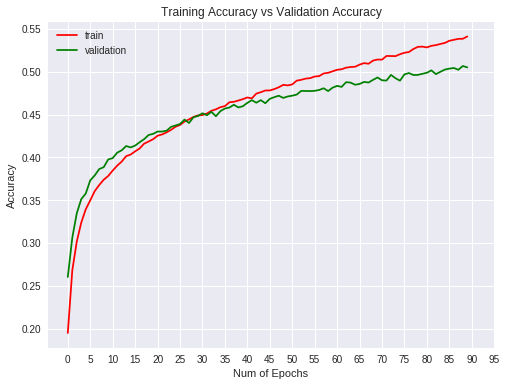

In [0]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 100, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

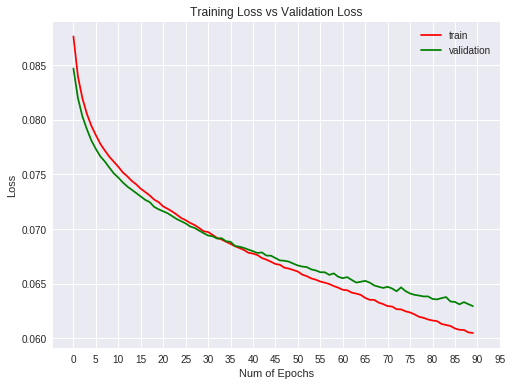

In [0]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 100, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

**Conclusion:**
Changed activation function to Leaked Relu and dropdown = 0.1. Models starts getting overfitting with increased Epochs.